In [1]:
import numpy as np
import math
import scipy.stats
import scipy.cluster
import matplotlib
import matplotlib.pyplot as plt

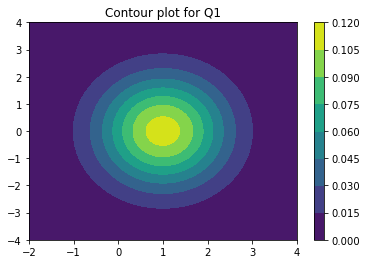

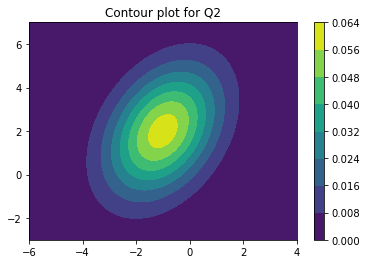

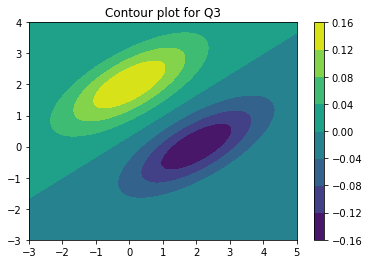

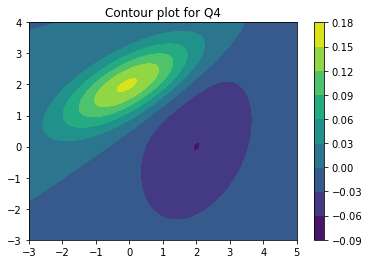

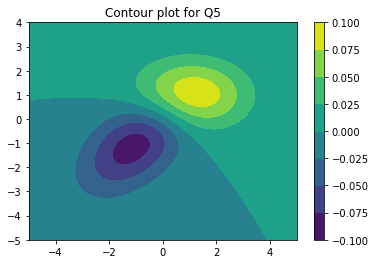

In [2]:
# Q3 Isocontours of Normal Distributions

# Part 1
x = np.linspace(-2, 4, 500)
y = np.linspace(-4, 4, 500)
X,Y = np.meshgrid(x, y)
data = np.dstack((X, Y))
rv = scipy.stats.multivariate_normal([1, 0], [[1, 0], [0, 2]])
Z = rv.pdf(data)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.title("Contour plot for Q1")
plt.show()

# Part 2
x = np.linspace(-6, 4, 500)
y = np.linspace(-3, 7, 500)
X,Y = np.meshgrid(x, y)
data = np.dstack((X, Y))
rv = scipy.stats.multivariate_normal([-1, 2], [[2, 1], [1, 4]])
Z = rv.pdf(data)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.title("Contour plot for Q2")
plt.show()

# Part 3
x = np.linspace(-3, 5, 500)
y = np.linspace(-3, 4, 500)
X,Y = np.meshgrid(x, y)
data = np.dstack((X, Y))
rv1 = scipy.stats.multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = scipy.stats.multivariate_normal([2, 0], [[2, 1], [1, 1]])
Z = rv1.pdf(data) - rv2.pdf(data)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.title("Contour plot for Q3")
plt.show()

# Part 4
x = np.linspace(-3, 5, 500)
y = np.linspace(-3, 4, 500)
X,Y = np.meshgrid(x, y)
data = np.dstack((X, Y))
rv1 = scipy.stats.multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = scipy.stats.multivariate_normal([2, 0], [[2, 1], [1, 4]])
Z = rv1.pdf(data) - rv2.pdf(data)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.title("Contour plot for Q4")
plt.show()

# Part 5
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 4, 500)
X,Y = np.meshgrid(x, y)
data = np.dstack((X, Y))
rv1 = scipy.stats.multivariate_normal([1, 1], [[2, 0], [0, 1]])
rv2 = scipy.stats.multivariate_normal([-1, -1], [[2, 1], [1, 2]])
Z = rv1.pdf(data) - rv2.pdf(data)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.title("Contour plot for Q5")
plt.show()

Sample Mean: [2.68846045 5.3888394 ]
Sample Cov:
[[7.42292904 3.00253936]
 [3.00253936 4.78474509]]
Eigenvalues: [9.38335628 2.82431785]
Eigenvectors:
[[ 0.83732346 -0.54670781]
 [ 0.54670781  0.83732346]]


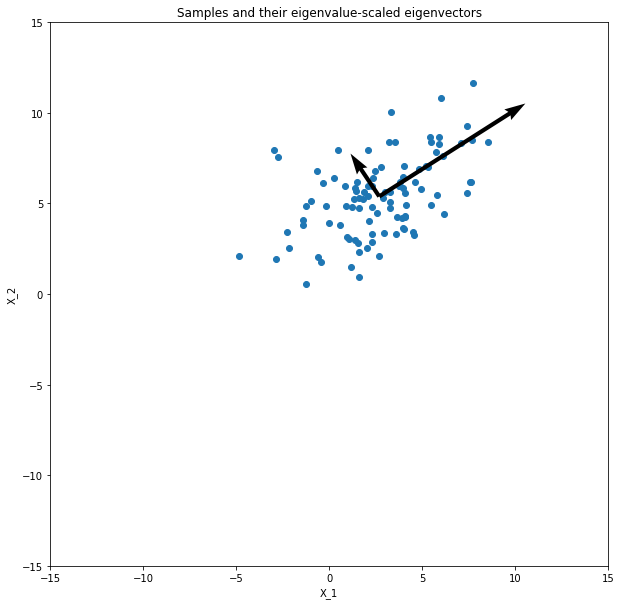

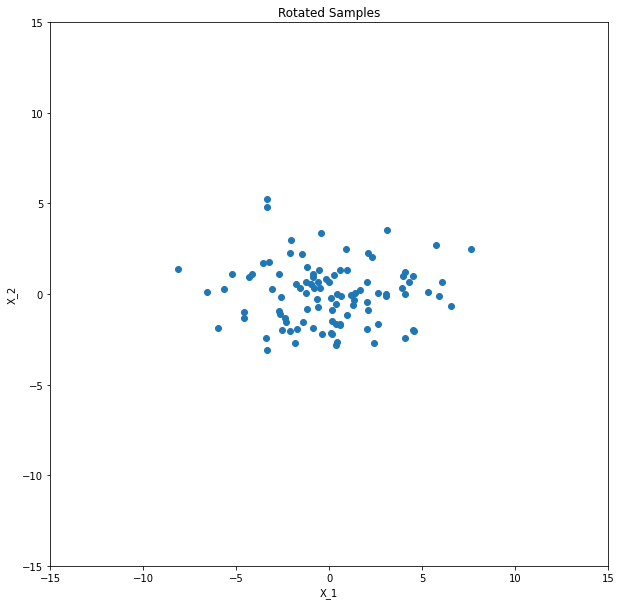

In [3]:
# Q4 Eigenvectors of the Gaussian Covariance Matrix

np.random.seed(42)
X_1 = np.random.normal(3, 3, 100)
X_2 = np.random.normal(4, 2, 100)
sample = np.array([(x_1, 0.5*x_1 + x_2) for (x_1, x_2) in zip(X_1, X_2)])

# Part 1
means = np.mean(sample, axis=0)
print("Sample Mean: {}".format(means))

# Part 2
covariance = np.cov(sample.T)
print("Sample Cov:")
print(covariance)

# Part 3
eigenvals, eigenvecs = np.linalg.eig(covariance)
print("Eigenvalues: {}".format(eigenvals))
print("Eigenvectors:")
print(eigenvecs)

# Part 4
plt.figure(figsize=(10,10))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.scatter(sample[:, 0], sample[:, 1])

x_1_mean_vec = [means[0], means[0]]
x_2_mean_vec = [means[1], means[1]]
scaled_eigenvec_0 = [eigenvecs[0][0] * eigenvals[0], eigenvecs[0][1] * eigenvals[1]]
scaled_eigenvec_1 = [eigenvecs[1][0] * eigenvals[0], eigenvecs[1][1] * eigenvals[1]]
plt.quiver(x_1_mean_vec, x_2_mean_vec, scaled_eigenvec_0, scaled_eigenvec_1, angles='xy', scale_units='xy', scale=1)
plt.title("Samples and their eigenvalue-scaled eigenvectors")
plt.show()

# Part 5
rotated_data = np.dot(eigenvecs.T, (sample - means).T).T
plt.figure(figsize=(10,10))
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.scatter(rotated_data[:, 0], rotated_data[:, 1])
plt.title("Rotated Samples")
plt.show()


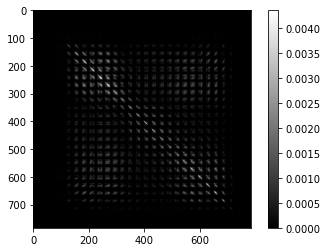

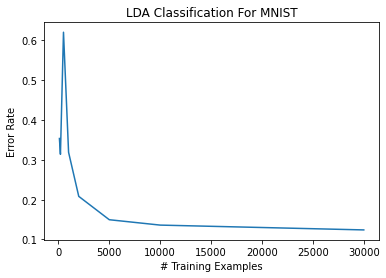

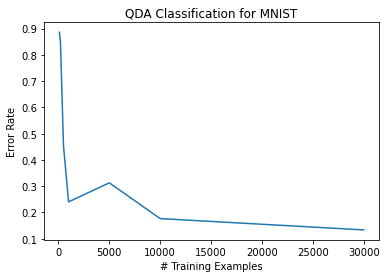

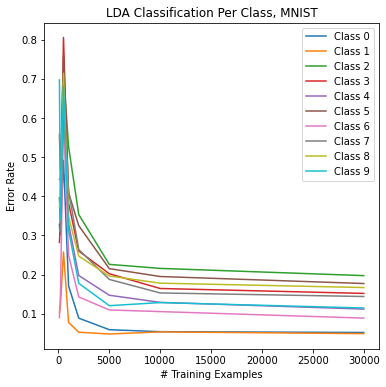

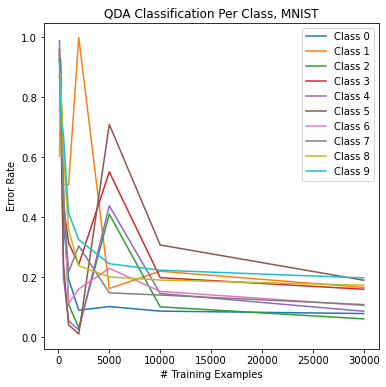

In [4]:
# Q8 Gaussian Classifiers for Digits and Spam

# Preparing the data
np.random.seed(42)
mnist_data = np.load(f"Desktop/Berkeley/Junior/CS 189/HWs/hw3/hw3-2023/data/mnist-data-hw3.npz")
spam_data = np.load(f"Desktop/Berkeley/Junior/CS 189/HWs/hw3/hw3-2023/data/spam-data-hw3.npz")

def shuffle_split(full_data, labels, val_data_size):
    size = len(full_data)
    assert size == len(labels)
    assert val_data_size >= 0
    if val_data_size < 1.0:
        val_data_size = int(val_data_size * size)
    permute = np.random.permutation(size)
    train_data_size = size - val_data_size
    train_data, train_labels = full_data[permute][:train_data_size], labels[permute][:train_data_size]
    val_data, val_labels = full_data[permute][train_data_size:], labels[permute][train_data_size:]
    return train_data, train_labels, val_data, val_labels

training_data, training_labels = mnist_data['training_data'], mnist_data['training_labels']
norms = np.linalg.norm(training_data, ord=2, axis=(2, 3))
normalized_training_data = training_data.reshape(len(training_data), -1) / norms
# print(training_data.reshape(len(training_data), -1).shape)
# print(normalized_training_data.shape)
# for i in range(len(training_data)):
        # normalized_training_data[i][0] = normalized_training_data[i][0] / norms[i]

# Part 1 
fitted_classes = {}
for i in range(0, 10):
    label_indices = np.where(training_labels == i)[0].flatten()
    class_data = normalized_training_data[label_indices]
    # print(class_data.shape)
    mean = np.mean(class_data, axis=0)
    # print(mean.shape)
    covariance = np.cov(class_data, rowvar=False)
    # print(covariance.shape)
    fitted_classes[i] = (mean, covariance)
    
# Part 2 
plt.imshow(abs(fitted_classes[5][1]), cmap="gray")
plt.colorbar()
plt.show()

# Part 3
train_data, train_labels, val_data, val_labels = ( 
    shuffle_split(normalized_training_data, training_labels, 10000))
num_train = [100, 200, 500, 1000, 2000, 5000, 10000, 30000]
err_lda = []
err_qda = []
class_err_lda = []
class_err_qda = []
classes = np.unique(val_labels)
  
# Functions for training/ predicting/ evaluating
def train(X, y):
    num_features = X.shape[1]
    num_examples = X.shape[0]
    pooled_covar = np.zeros((num_features, num_features))
    classes = np.unique(y)
    fitted_classes = []
    for c in classes:
        label_indices = np.where(y == c)[0].flatten()
        class_data = X[label_indices]
        # print(class_data.shape)
        mean = np.mean(class_data, axis=0)
        # print(mean.shape)
        prior = class_data.shape[0] / num_examples
        covariance_unscaled = np.cov(class_data, rowvar=False, bias=True)
        covariance_scaled = covariance_unscaled * prior
        pooled_covar = np.add(pooled_covar, covariance_scaled)
        fitted_classes.append((c, mean, covariance_scaled, prior))
    pooled_covar = pooled_covar / num_examples
    return pooled_covar, fitted_classes
    
def predict_lda(X, pooled_covar, fitted_classes):
    # print(X.shape)
    pred = np.array([scipy.stats.multivariate_normal.logpdf(X, mean=mean, cov=pooled_covar, allow_singular=True) 
                     + math.log(prior) for (c, mean, covariance_unscaled, prior) in fitted_classes])
    # print(pred, pred.shape)
    # print(np.argmax(pred, axis=0).shape)
    # print(classes[np.argmax(pred, axis=0)])
    # print(classes[np.argmax(pred, axis=0)].reshape(-1,1))
    # print(classes)
    return classes[(np.argmax(pred, axis=0))]

def predict_qda(X, fitted_classes):
    pred = np.array([scipy.stats.multivariate_normal.logpdf(X, mean=mean, cov=covariance_scaled, allow_singular=True)
                    + math.log(prior) for (c, mean, covariance_scaled, prior) in fitted_classes])
    return classes[(np.argmax(pred, axis=0))]

def evaluate(X, y, pooled_covar, fitted_classes, mode="lda"):
    if mode=="lda":
        pred = predict_lda(X, pooled_covar, fitted_classes)
    else:
        pred = predict_qda(X, fitted_classes)
    # print(pred.shape)
    # print(y.shape)
    # print(pred)
    # print(y)
    # print(np.sum(pred==y))
    # print(y.shape[0])
    total_error = np.sum(pred == y) / y.shape[0]
    error_by_class = []
    for i in range(0, 10):
        error_by_class.append(np.count_nonzero((pred == i) & (i == y)) / np.count_nonzero(i == y)) 
    return total_error, error_by_class

for n in num_train:
    pooled_covar, fitted_classes = train(train_data[:n], train_labels[:n])
    total_error, error_by_class = evaluate(val_data, val_labels, pooled_covar, fitted_classes, mode="lda")
    lda_err = 1 - total_error
    err_lda.append(lda_err)
    class_err_lda.append(error_by_class)
    total_error, error_by_class = evaluate(val_data, val_labels, pooled_covar, fitted_classes, mode="qda")
    qda_err = 1 - total_error
    err_qda.append(qda_err)
    class_err_qda.append(error_by_class)

# Part (a)
plt.plot(num_train, err_lda)
plt.xlabel("# Training Examples")
plt.ylabel("Error Rate")
plt.title("LDA Classification For MNIST")
plt.show()

# Part (b)
plt.plot(num_train, err_qda)
plt.xlabel("# Training Examples")
plt.ylabel("Error Rate")
plt.title("QDA Classification for MNIST")
plt.show()

# print(class_err_qda)
# print(class_err_lda[:][0])

# Part (d)
fig, ax1 = plt.subplots(figsize=(6, 6))
for c in classes:
    error_rates_lda = [(1 - sub_arr[c]) for sub_arr in class_err_lda]
    ax1.plot(num_train, error_rates_lda, label=f"Class {c}")
ax1.set_xlabel("# Training Examples")
ax1.set_ylabel("Error Rate")
ax1.set_title("LDA Classification Per Class, MNIST")
ax1.legend()
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 6))
for c in classes:
    error_rates_qda = [(1 - sub_arr[c]) for sub_arr in class_err_qda]
    # print(error_rates_qda)
    ax2.plot(num_train, error_rates_qda, label=f"Class {c}")
ax2.set_xlabel("# Training Examples")
ax2.set_ylabel("Error Rate")
ax2.set_title("QDA Classification Per Class, MNIST")
ax2.legend()
plt.show()
        

In [5]:
# Kaggle
import csv

# For MNIST dataset
with open('hw3_mnist_test0', mode='w') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(['Id', 'Category'])
    new_normalized_mnist_train = scipy.cluster.vq.whiten(
        mnist_data["training_data"].reshape((
            len(mnist_data["training_data"]), -1)))
    pooled_covar, fitted_classes = train(new_normalized_mnist_train, mnist_data["training_labels"])
    pred = predict_qda(mnist_data['test_data'].reshape(
        len(mnist_data['test_data']), 784), fitted_classes)
    for idx, x in enumerate(pred):
        writer.writerow([idx+1, x])


/opt/anaconda3/lib/python3.8/site-packages/scipy/cluster/vq.py:135: RuntimeWarning: Some columns have standard deviation zero. The values of these columns will not change.
  warnings.warn("Some columns have standard deviation zero. "


In [6]:
# For Spam DataSet: Cleaning Code
def train_spam(X, y):
    num_features = X.shape[1]
    num_examples = X.shape[0]
    pooled_covar = np.zeros((num_features, num_features))
    classes = np.unique(y)
    fitted_classes = []
    for c in classes:
        label_indices = np.where(y == c)[0].flatten()
        class_data = X[label_indices]
        # print(class_data.shape)
        mean = np.mean(class_data, axis=0)
        # print(mean.shape)
        covariance_unscaled = np.cov(class_data, rowvar=False, bias=True)
        # covariance_scaled = covariance_unscaled / class_data.shape[0]
        # pooled_covar = np.add(pooled_covar, covariance_unscaled)
        prior = class_data.shape[0] / num_examples
        fitted_classes.append((c, mean, covariance_unscaled, prior))
    pooled_covar = pooled_covar / num_examples
    return pooled_covar, fitted_classes, classes

def predict_qda_spam(X, fitted_classes, classes):
    pred = np.array([scipy.stats.multivariate_normal.logpdf(X, mean=mean, cov=covariance_scaled, allow_singular=True)
                    + math.log(prior) for (c, mean, covariance_scaled, prior) in fitted_classes])
    return classes[(np.argmax(pred, axis=0))]

In [7]:
# print(spam_data["training_data"].shape, spam_data["training_labels"].shape, spam_data["test_data"].shape)
with open('hw3_spam_test0', mode='w') as file:
     writer = csv.writer(file, delimiter=',')
     writer.writerow(['Id', 'Category'])
     new_normalized_spam_train = scipy.cluster.vq.whiten(spam_data["training_data"])
     # print(new_normalized_spam_train.shape)
     pooled_covar, fitted_classes, classes = train_spam(new_normalized_spam_train, spam_data["training_labels"])
     pred = predict_qda_spam(spam_data['test_data'], fitted_classes, classes)
     for idx, x in enumerate(pred):
         writer.writerow([idx+1, x])